<a href="https://colab.research.google.com/github/abidur0177/Natural_Language_Processing/blob/main/IMDB_review_single_layer_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this project, I will classify IMDB reviews with single layer LSTM architecture. I will use the subwords8k pre-tokenized IMDB Reviews dataset for this project.

### Import the libraries and dataset

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [7]:
# Download the dataset
dataset, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

In [9]:
# See the info about the dataset
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/subwords8k/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Uses `tfds.deprecated.text.SubwordTextEncoder` with 8k vocab size
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_dir='/root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0',
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=54.72 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(None,), dtype=int64, encoder=<SubwordTextEncoder vocab_size=8185>),
    }),
    supervised_keys=('text', 'label'),
    

In [10]:
# Get the subword tokenizer from the "Features" parameter of the info
tokenizer = info.features['text'].encoder

### Prepare the Dataset

In [22]:
# Get the training and testing dataset
train_data, test_data = dataset['train'], dataset['test']

# Shuffle the training dataset
# First define the batch size
buffer_size =12000
train_dataset = train_data.shuffle(buffer_size)

# Define the batch and pad the sequences
batch_size = 256
train_dataset = train_dataset.padded_batch(batch_size)
test_dataset = test_data.padded_batch(batch_size)

### Build and compile the model

In [28]:
from tensorflow import keras

# Define the dimension of each layer
embed_dim = 32
lstm_dim = 16
dense_dim = 16

# Define the model architecture
model = keras.Sequential([
    keras.layers.Embedding(tokenizer.vocab_size, embed_dim),
    keras.layers.Bidirectional(keras.layers.LSTM(lstm_dim)),
    keras.layers.Dense(dense_dim, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          261920    
                                                                 
 bidirectional_3 (Bidirecti  (None, 32)                6272      
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 268737 (1.03 MB)
Trainable params: 268737 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# Compile the model
model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(), metrics=keras.metrics.Accuracy())

### Train the model and observe the validation

In [30]:
num_epoch = 10

history = model.fit(train_dataset, epochs=num_epoch, validation_data = test_dataset)

Epoch 1/10
98/98 [==============================] - 290s 3s/step - loss: 0.6322 - accuracy: 0.0000e+00 - val_loss: 0.4914 - val_accuracy: 0.0000e+00
Epoch 2/10
98/98 [==============================] - 280s 3s/step - loss: 0.3999 - accuracy: 0.0000e+00 - val_loss: 0.4194 - val_accuracy: 0.0000e+00
Epoch 3/10
98/98 [==============================] - 296s 3s/step - loss: 0.2957 - accuracy: 0.0000e+00 - val_loss: 0.4114 - val_accuracy: 0.0000e+00
Epoch 4/10
98/98 [==============================] - 285s 3s/step - loss: 0.2376 - accuracy: 0.0000e+00 - val_loss: 0.4021 - val_accuracy: 0.0000e+00
Epoch 5/10
98/98 [==============================] - 306s 3s/step - loss: 0.3557 - accuracy: 0.0000e+00 - val_loss: 0.4688 - val_accuracy: 0.0000e+00
Epoch 6/10
98/98 [==============================] - 278s 3s/step - loss: 0.2894 - accuracy: 0.0000e+00 - val_loss: 0.3913 - val_accuracy: 0.0000e+00
Epoch 7/10
98/98 [==============================] - 277s 3s/step - loss: 0.1962 - accuracy: 0.0000e+00 - v

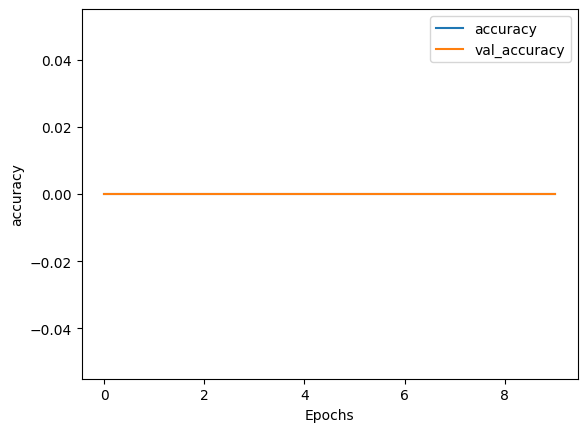

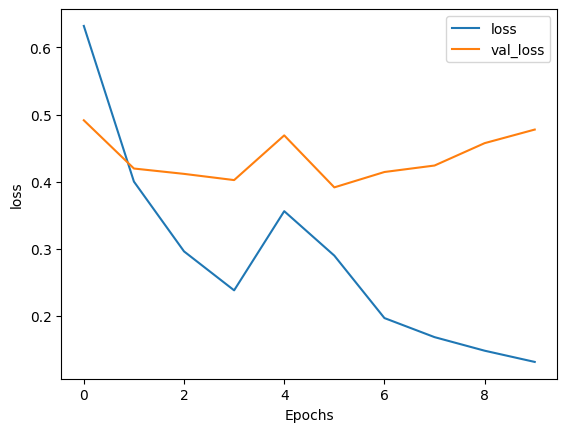

In [31]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")